# Personalized Stock Prediction App

# High-level Overview

Predicting stock prices is a challenging task due to the inherent complexity and variability of financial markets. This project aims to leverage historical stock price data to predict future trends using machine learning and deep learning models. By addressing this problem, we provide tools for informed decision-making in finance and investment.

# Description of Input Data

The dataset used in this project is sourced from the Yahoo Finance API. It includes daily stock data for various companies and contains the following variables:
- **Date**: Date of daily stock.
- **Open**: Opening price of the stock.
- **Close**: Closing price of the stock.
- **High**: Highest price of the stock during the day.
- **Low**: Lowest price of the stock during the day.
- **Volume**: Number of shares traded.

These variables are crucial for understanding stock behavior and predicting future trends.

# Strategy for Solving the Problem

1. **Exploratory Data Analysis (EDA):**
   - Identify patterns and trends in historical data.
   - Visualize stock price movements over time.

2. **Preprocessing:**
   - Normalize data for model compatibility.
   - Feature engineering to extract relevant information.

3. **Modeling:**
   - Evaluate multiple models (Linear Regression, Decision Trees, LSTM).
   - Compare their performances using standard metrics.

4. **Deployment:**
   - Develop an interactive Streamlit application for predictions.

# Discussion of the Expected Solution

The solution involves creating a machine learning pipeline with the following components:

- **Data Preprocessing Module:** Cleans and prepares data for analysis.
- **Model Training Module:** Implements and trains various models.
- **Evaluation Module:** Assesses model performance using metrics like MSE and R².
- **User Interface:** Provides predictions and insights via an interactive web application.

This architecture ensures modularity and ease of understanding.


# Metrics with Justification

The following metrics are used to evaluate model performance:

- **Mean Squared Error (MSE):** Measures prediction accuracy by quantifying the average squared difference between predicted and actual values.
- **R² Score:** Indicates the proportion of variance explained by the model. A higher R² implies better performance.
- **Prediction Accuracy:** Evaluates the percentage of predictions close to actual values.

These metrics are relevant as they address both accuracy and reliability of predictions.

---

# Exploratory Data Analysis (EDA)

In [1]:
# might need updata yfinance to the latest to scrape the data successfully
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
#Import relevent packages

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


# Getting Data through API 

In [3]:
#Define the stock ticker and pull the historical data from a start date
ticker=yf.Ticker('AAPL')
start=dt.datetime(2011, 1, 1)
end=dt.datetime.now()

data=ticker.history(start=start, end=end, interval="1d")
print('The shape of the data is ', data.shape)
data.tail()

The shape of the data is  (3520, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-20 00:00:00-05:00,248.039993,255.000000,245.690002,254.490005,147495300,0.0,0.0
2024-12-23 00:00:00-05:00,254.770004,255.649994,253.449997,255.270004,40858800,0.0,0.0
2024-12-24 00:00:00-05:00,255.490005,258.209991,255.289993,258.200012,23234700,0.0,0.0
2024-12-26 00:00:00-05:00,258.190002,260.100006,257.630005,259.019989,27263000,0.0,0.0
2024-12-27 00:00:00-05:00,257.829987,258.700012,253.059998,255.589996,42317100,0.0,0.0


# Data Preprocess and Visualization

In [4]:
#Select the daily closing price and normalize the data to (0,1)

data_close=data.Close.values.reshape(-1,1)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_close)
scaled_data

array([[0.00172054],
       [0.00192819],
       [0.00225539],
       ...,
       [0.99671379],
       [1.        ],
       [0.98625366]])

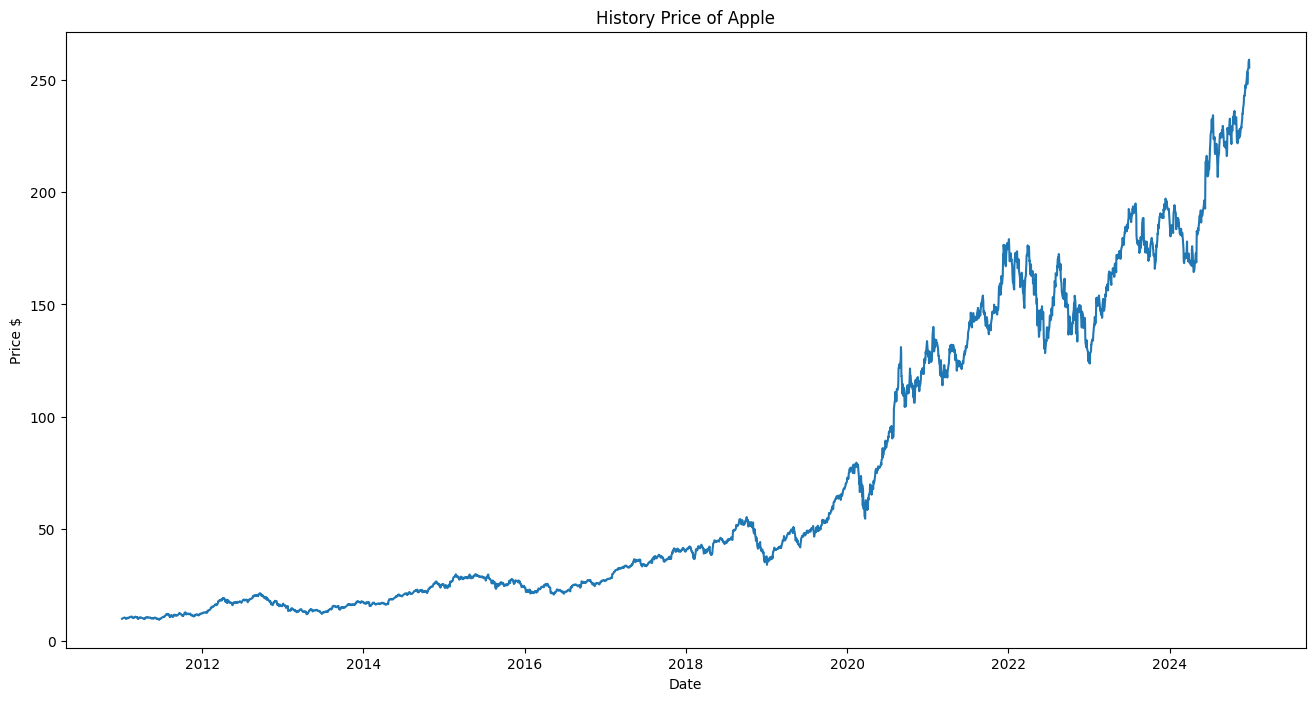

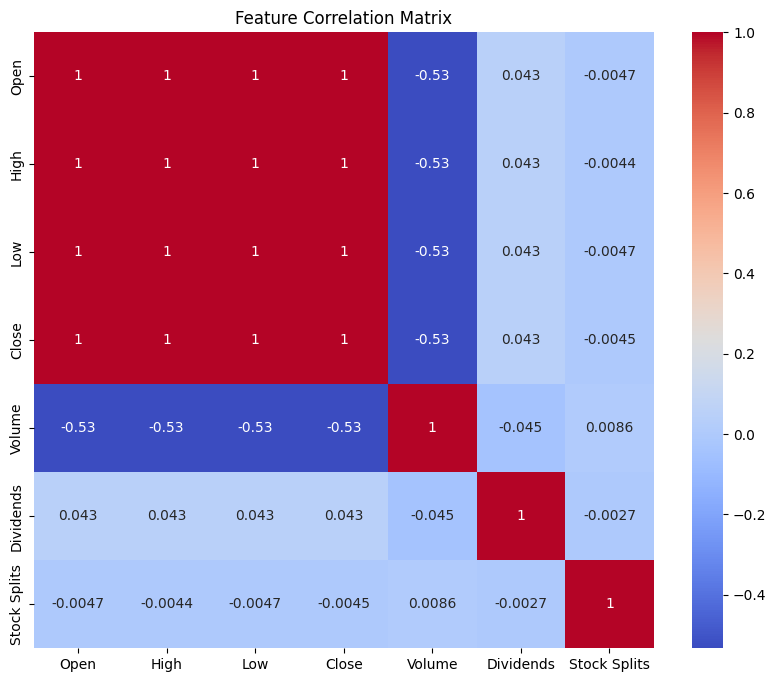

In [5]:
#Visualize the historical data

plt.figure(figsize=(16, 8))
plt.title('History Price of Apple')
plt.plot(data.Close)
plt.xlabel('Date')
plt.ylabel('Price $')
plt.show()

### Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## Insights from Exploratory Data Analysis (EDA)
### Stock Price Trend Over Time:

The line plot of the stock's closing price over time reveals a significant upward trend.
This suggests that the stock has generally appreciated in value, possibly due to company growth, market factors, or broader economic conditions.
The visualization also highlights periods of volatility, with sharp increases or decreases in the stock price. These may correspond to market events or company-specific news.

### Correlation Matrix:

The heatmap of feature correlations indicates strong positive correlations among the Open, Close, High, and Low prices. This is expected as these prices are interdependent and derived from daily trading activity.
A negative correlation between Volume and price variables suggests that higher trading volumes may often accompany lower stock prices or vice versa, indicating a possible inverse relationship worth exploring.
Other features like Dividends and Stock Splits show weaker correlations with price-related variables, suggesting that their direct impact on daily price movements may be limited in the dataset's timeframe.
These insights provide a foundation for selecting features and designing predictive models that leverage these relationships effectively. Let me know if you'd like to elaborate further on any aspect.

# Prepare Data for Different Training Models

# Data Preprocessing

In this section, we prepare the dataset for machine learning by addressing missing values, scaling the data, and creating lagged features. These steps ensure that the data is clean, normalized, and ready for predictive modeling. 

1. **Filling Missing Values:**
   - Missing values in the dataset are filled using forward-fill to propagate the last valid observation, ensuring no gaps remain.

2. **Scaling Data:**
   - The `Close` prices are scaled to a range of 0 to 1 using the `MinMaxScaler`. This normalization ensures all features have consistent scales, which is crucial for model training, especially in gradient-based algorithms.

3. **Feature Engineering:**
   - Lagged features (`Lag_1`, `Lag_2`, `Lag_3`) are created, representing the closing prices from the previous 1, 2, and 3 days. These features capture temporal dependencies for better forecasting.

4. **Removing Missing Rows:**
   - Rows with missing values introduced by lagging are dropped to ensure a clean dataset for model training.

5. **Splitting Data:**
   - The processed dataset is split into training (80%) and testing (20%) sets to evaluate model performance.


In [6]:
data.ffill()
scaler = MinMaxScaler()
data['Scaled_Close'] = scaler.fit_transform(data[['Close']])
for lag in range(1, 4):
    data[f'Lag_{lag}'] = data['Scaled_Close'].shift(lag)
data.dropna(inplace=True)
X = data[[f'Lag_{lag}' for lag in range(1, 4)]]
y = data['Scaled_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

We implement and evaluate three machine learning models to predict stock prices:

1. **Linear Regression:**
   - A simple and interpretable model that assumes a linear relationship between features and the target variable.

2. **Decision Tree Regression:**
   - A tree-based model that captures non-linear patterns in the data by splitting the dataset based on feature values.

3. **Support Vector Regression (SVR):**
   - A model that uses kernel functions (e.g., radial basis function) to handle non-linear relationships in the data.


In [7]:

def train_test_split_lstm(data, prediction_days, train_size=0.9):
    
    '''Split train and test data for RNN model
    
    Split train and test data according to the ratio in time order
    
    Args:
        data is the preprocessed historical data
        prediction_days is the number of historical data to use as input
        train_size is the ratio of training set
        
    Returns:
        input and label for training set and test set
        
    '''
    
    n_train=int(len(data)*train_size)
    x_train, y_train, x_test, y_test=[], [], [], []
    
    for i in range(prediction_days, n_train):
        x_train.append(data[i-prediction_days:i, 0])
        y_train.append(data[i, 0])
    
    for j in range(n_train, len(data)):
        x_test.append(data[j-prediction_days:j, 0])
        y_test.append(data[j, 0])
    
    x_train, y_train=np.array(x_train), np.array(y_train)
    x_test, y_test=np.array(x_test), np.array(y_test)
    x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    return x_train, y_train, x_test, y_test
    

In [8]:
# Train test split for RNN model

prediction_days=60 # number of days used as input

x_train, y_train, x_test, y_test=train_test_split_lstm(scaled_data, prediction_days)

print('x_train has {} samples, x_test has {} samples'.format(x_train.shape[0], x_test.shape[0]))

x_train has 3108 samples, x_test has 352 samples


In [9]:
# Train test split for regression model

# number of historical data as input
num_days=252
# predict the stock price of future days
future_days=1
# get historical data
data_reg=data_close[-num_days:]
X=data_reg[:-future_days]
y=data_reg[future_days:]

# train test split and future data, set shuffle to false
x_train1, x_test1, y_train1, y_test1=train_test_split(X, y, test_size=0.2, shuffle=False)
x_future=X[-future_days:]

# Regression Model

Build regression model using the data from the previous year from now. 

In [10]:
# DecisionTree, LinearRegression, SVM model
dt=DecisionTreeRegressor().fit(x_train1, y_train1)
lr=LinearRegression().fit(x_train1, y_train1)
svm=SVR(kernel='poly').fit(x_train1, y_train1.ravel())

# evaluate the performance of the model on training set
print('For training set: ')
print('Linear      : mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train1, lr.predict(x_train1)),\
                                                                     r2_score(y_train1, lr.predict(x_train1))))
print('DecisionTree: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train1, dt.predict(x_train1)),\
                                                                     r2_score(y_train1, dt.predict(x_train1))))
print('SVM         : mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train1, svm.predict(x_train1)),\
                                                                     r2_score(y_train1, svm.predict(x_train1))))

# make predictions on the testset
dt_pred=dt.predict(x_test1)
lr_pred=lr.predict(x_test1)
svm_pred=svm.predict(x_test1)

# evaluate the performance of the model on test set
print('For test set: ')
print('Linear      : mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test1, lr_pred),\
                                                                     r2_score(y_test1, lr_pred)))
print('DecisionTree: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test1, dt_pred),\
                                                                     r2_score(y_test1, dt_pred)))
print('SVM         : mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test1, svm_pred),\
                                                                     r2_score(y_test1, svm_pred)))


For training set: 
Linear      : mean square error is 9.041084024653118, r2_score is 0.9814316313710243
DecisionTree: mean square error is 0.007339471674640663, r2_score is 0.9999849263633404
SVM         : mean square error is 12.364304160098332, r2_score is 0.9746064789510357
For test set: 
Linear      : mean square error is 5.7461654288819135, r2_score is 0.9498572606710564
DecisionTree: mean square error is 186.53650673719662, r2_score is -0.6277727379100158
SVM         : mean square error is 49.5383927917584, r2_score is 0.5677133303460606


**Display the test prediction (recent stock price)**

In [11]:
data_future=data[-len(x_test1):]
data_future['dt prediction']=dt_pred
data_future['lr prediction']=lr_pred
data_future['svm prediction']=svm_pred
data_future=data_future[['Close', 'dt prediction', 'lr prediction', 'svm prediction']]
data_future.tail()

C:\Users\CWSmith\AppData\Local\Temp\ipykernel_35040\1270580335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_future['dt prediction']=dt_pred
C:\Users\CWSmith\AppData\Local\Temp\ipykernel_35040\1270580335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_future['lr prediction']=lr_pred
C:\Users\CWSmith\AppData\Local\Temp\ipykernel_35040\1270580335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Close,dt prediction,lr prediction,svm prediction
Date,,,,
2024-12-20 00:00:00-05:00,254.490005,228.364136,249.831041,260.899362
2024-12-23 00:00:00-05:00,255.270004,228.364136,254.516076,268.356183
2024-12-24 00:00:00-05:00,258.200012,228.364136,255.293589,269.620700
2024-12-26 00:00:00-05:00,259.019989,228.364136,258.214260,274.440204
2024-12-27 00:00:00-05:00,255.589996,228.364136,259.031623,275.808724


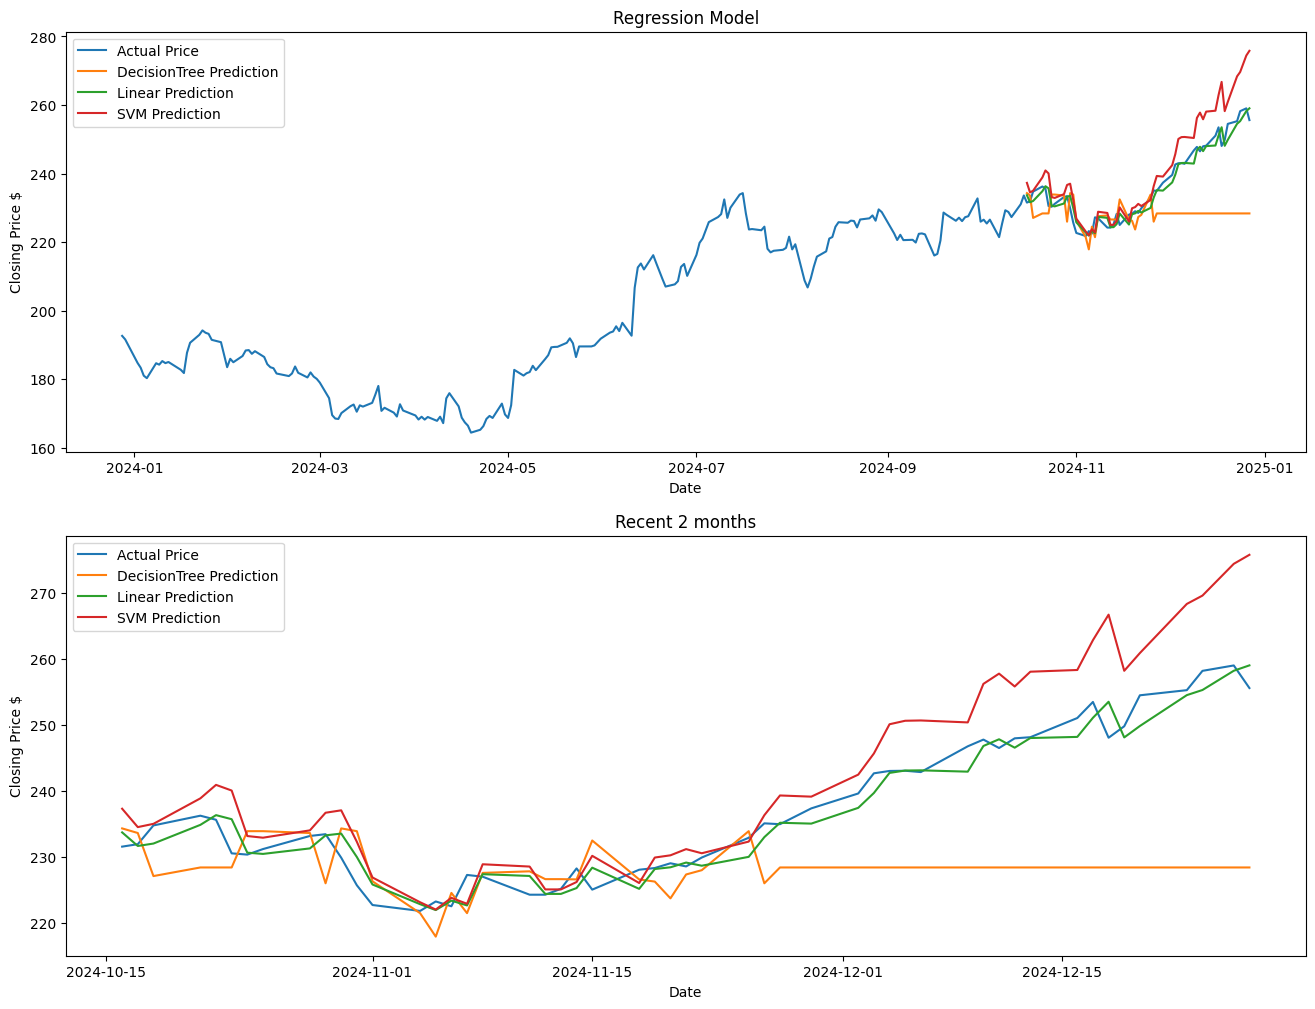

In [12]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.title('Regression Model')
plt.plot(data.Close[-num_days:])
plt.plot(data_future['dt prediction'])
plt.plot(data_future['lr prediction'])
plt.plot(data_future['svm prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'DecisionTree Prediction', 'Linear Prediction', 'SVM Prediction'])

plt.subplot(2, 1, 2)
plt.title('Recent 2 months')
plt.plot(data.Close[-len(y_test1):])
plt.plot(data_future['dt prediction'])
plt.plot(data_future['lr prediction'])
plt.plot(data_future['svm prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'DecisionTree Prediction', 'Linear Prediction', 'SVM Prediction'])
plt.show()

### Gridsearch to optimize parameters

In [13]:
# Optimize parameters for DecisionTree Regression

model=DecisionTreeRegressor()
parameters = {
    'max_depth': (None, 2, 3, 5, 8),  # Example depths
    'criterion': ('squared_error', 'absolute_error'),  # Correct values
    'splitter': ('best', 'random')  # Split methods
}

cv_dt=GridSearchCV(model, param_grid=parameters,verbose=3)
cv_dt.fit(x_train1, y_train1)
cv_dt_pred=cv_dt.predict(x_test1)

print('The best parameter set: ', cv_dt.best_params_)
print('Trainset: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train1, cv_dt.predict(x_train1)),\
                                                                     r2_score(y_train1, cv_dt.predict(x_train1))))
print('Testset: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test1, cv_dt_pred),\
                                                                     r2_score(y_test1, cv_dt_pred)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=squared_error, max_depth=None, splitter=best;, score=-0.176 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=None, splitter=best;, score=-1.488 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=None, splitter=best;, score=0.872 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=None, splitter=best;, score=0.594 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=None, splitter=best;, score=0.230 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=None, splitter=random;, score=-0.156 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=None, splitter=random;, score=-1.577 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=None, splitter=random;, score=0.889 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=None, splitter=random;, score=0.608 total time=   0.0s
[CV 5/5] END crit

In [14]:
# Optimize parameters for SVM Regression
model=SVR()
print(model.get_params())
parameters={'kernel': ('poly', 'rbf', 'sigmoid'),       #poly
            'C': (0.0001, 0.001, 0.01, 0.1, 1.0)        #C=1.0 
           }

cv_svm=GridSearchCV(model, param_grid=parameters, verbose=3)
cv_svm.fit(x_train1, y_train1.ravel())
cv_svm_pred=cv_svm.predict(x_test1)

print('The best parameter set: ', cv_svm.best_params_)
print('Trainset: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train1, cv_svm.predict(x_train1)),\
                                                                     r2_score(y_train1, cv_svm.predict(x_train1))))
print('Testset: mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test1, cv_svm_pred),\
                                                                     r2_score(y_test1, cv_svm_pred)))

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .............C=0.0001, kernel=poly;, score=0.583 total time=   0.0s
[CV 2/5] END ............C=0.0001, kernel=poly;, score=-0.526 total time=   0.0s
[CV 3/5] END .............C=0.0001, kernel=poly;, score=0.892 total time=   0.0s
[CV 4/5] END .............C=0.0001, kernel=poly;, score=0.656 total time=   0.0s
[CV 5/5] END ............C=0.0001, kernel=poly;, score=-0.178 total time=   0.0s
[CV 1/5] END ............C=0.0001, kernel=rbf;, score=-37.218 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=rbf;, score=-101.130 total time=   0.0s
[CV 3/5] END .............C=0.0001, kernel=rbf;, score=-0.588 total time=   0.0s
[CV 4/5] END ............C=0.0001, kernel=rbf;, score=-21.317 total time=   0.0s
[CV 5/5] END ............C=0.0001, 

### Final prediction for the next day stock price

In [15]:
# Forecast the stock price for the next day

x_next_day=data_reg[-future_days].reshape(-1,1)
lr_next_day=lr.predict(x_next_day)
dt_next_day=cv_dt.predict(x_next_day)
svm_next_day=cv_svm.predict(x_next_day)
print('Next day prediction by Linear model is ', lr_next_day)
print('Next day prediction by DecisionTree model is ', dt_next_day)
print('Next day prediction by SVM model is', svm_next_day)


Next day prediction by Linear model is  [[255.61256109]]
Next day prediction by DecisionTree model is  [227.12011719]
Next day prediction by SVM model is [269.92527598]


### Final model assessment

In [16]:
lr_rmse=np.sqrt(mean_squared_error(y_test1, lr_pred))
dt_rmse=np.sqrt(mean_squared_error(y_test1, cv_dt_pred))
svm_rmse=np.sqrt(mean_squared_error(y_test1, cv_svm_pred))
average_price=np.mean(y_test1)
lr_percent=np.round(lr_rmse/average_price*100.0, 2)
dt_percent=np.round(dt_rmse/average_price*100.0, 2)
svm_percent=np.round(svm_rmse/average_price*100.0, 2)
print('Predicted value is within {}% of the actual value on average for Linear Regression.'.format(lr_percent))
print('Predicted value is within {}% of the actual value on average for DecisionTree Regression.'.format(dt_percent))
print('Predicted value is within {}% of the actual value on average for SVM Regression.'.format(svm_percent))

Predicted value is within 1.01% of the actual value on average for Linear Regression.
Predicted value is within 6.06% of the actual value on average for DecisionTree Regression.
Predicted value is within 2.92% of the actual value on average for SVM Regression.


# RNN model

In [17]:
# LSTM model parameters

lstm_size=64
input_size=(x_train.shape[1], x_train.shape[2])
dropout=0.2
dense_size=10

In [18]:
# build LSTM model and train the model for 20 epochs

def create_model(lstm_size=64, dropout=0.2, dense_size=10):
    
    model=Sequential()
    model.add(LSTM(units=lstm_size, return_sequences=True, input_shape=input_size))
    model.add(Dropout(dropout))
    model.add(LSTM(units=lstm_size, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(units=dense_size))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model=create_model(lstm_size, dropout, dense_size)
model.summary()
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,581 (197.58 KB)

 Trainable params: 50,581 (197.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0195 - val_loss: 0.0053
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011 - val_loss: 8.2697e-04
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.2060e-04 - val_loss: 7.4886e-04
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 6.8545e-04 - val_loss: 7.1616e-04
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.6498e-04 - val_loss: 7.6640e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.1538e-04 - val_loss: 6.9737e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.2428e-04 - val_loss: 8.9162e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 5.7239e-04 - val_loss: 7.1203e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.6044e-04 - val_loss: 0.0010
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.3911e-04 - val_loss: 7.5680e-04
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.1914e-04 - val_loss: 6.

In [19]:
y_pred=model.predict(x_test)

y_fit=model.predict(x_train)
y_fit_price=scaler.inverse_transform(y_fit)
y_train_price=scaler.inverse_transform(y_train.reshape(-1,1))
y_test_price=scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_price=scaler.inverse_transform(y_pred)

print('For training set: ')
print('mean square error is {}, r2_score is {}'.format(mean_squared_error(y_train_price, y_fit_price),\
                                                       r2_score(y_train_price, y_fit_price)))
print('For test set: ')
print('mean square error is {}, r2_score is {}'.format(mean_squared_error(y_test_price, y_pred_price),\
                                                       r2_score(y_test_price, y_pred_price)))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
For training set: 
mean square error is 10.565372493043553, r2_score is 0.996161393281586
For test set: 
mean square error is 33.78959856158392, r2_score is 0.9448309743268847


In [20]:
# final assessment
lstm_rmse=np.sqrt(mean_squared_error(y_test_price, y_pred_price))
average_price=np.mean(y_test_price)
lstm_percent=np.round(lstm_rmse/average_price*100.0, 2)

print('Predicted value is within {}% of the actual value on average for LSTM.'.format(lstm_percent))


Predicted value is within 2.92% of the actual value on average for LSTM.


**LSTM performance**

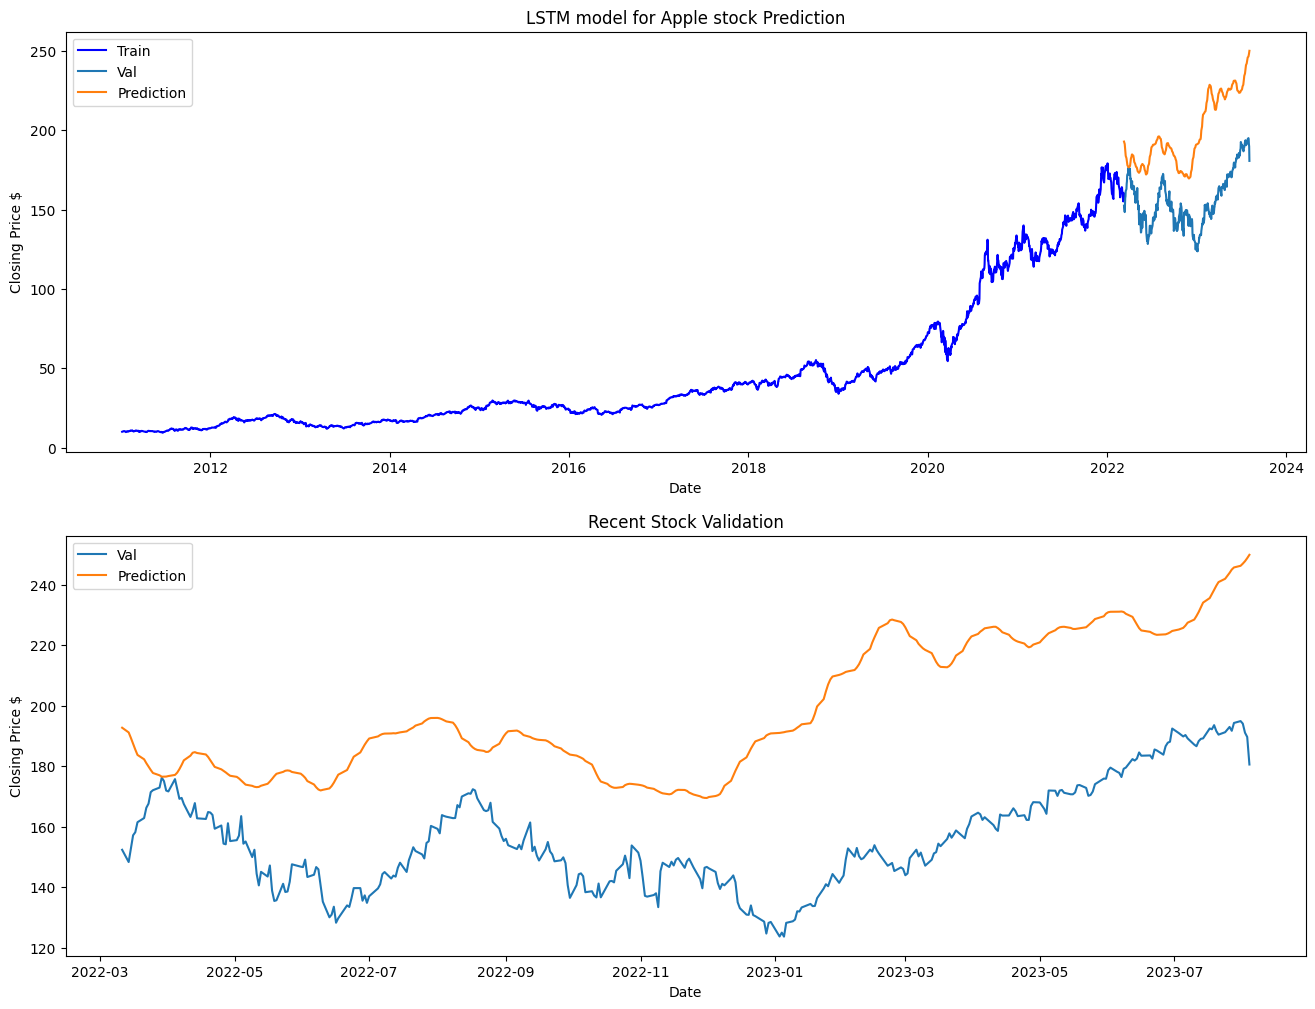

In [24]:
# Ensure `n_train` and `train` are defined correctly
n_train = len(X_train)  # Adjust n_train to be based on X_train
train = data.iloc[:n_train, :]

# Define `valid` DataFrame
valid = data.iloc[n_train:, :].copy()  # Create a copy of the valid set

# Adjust `y_pred_price` length to match `valid`
if len(y_pred_price) > len(valid):
    y_pred_price = y_pred_price[:len(valid)]  # Trim predictions if too long
elif len(y_pred_price) < len(valid):
    valid = valid.iloc[:len(y_pred_price)]  # Trim valid set if predictions are shorter

# Add predictions to `valid`
valid['Prediction'] = y_pred_price

# Plot the results
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.title('LSTM model for Apple stock Prediction')
plt.plot(train['Close'], color='blue', label='Train')
plt.plot(valid[['Close', 'Prediction']])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Train', 'Val', 'Prediction'])

plt.subplot(2, 1, 2)
plt.title('Recent Stock Validation')
plt.plot(valid[['Close', 'Prediction']])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Val', 'Prediction'])
plt.show()


**Plot recent stock prediction and compare with actual price**

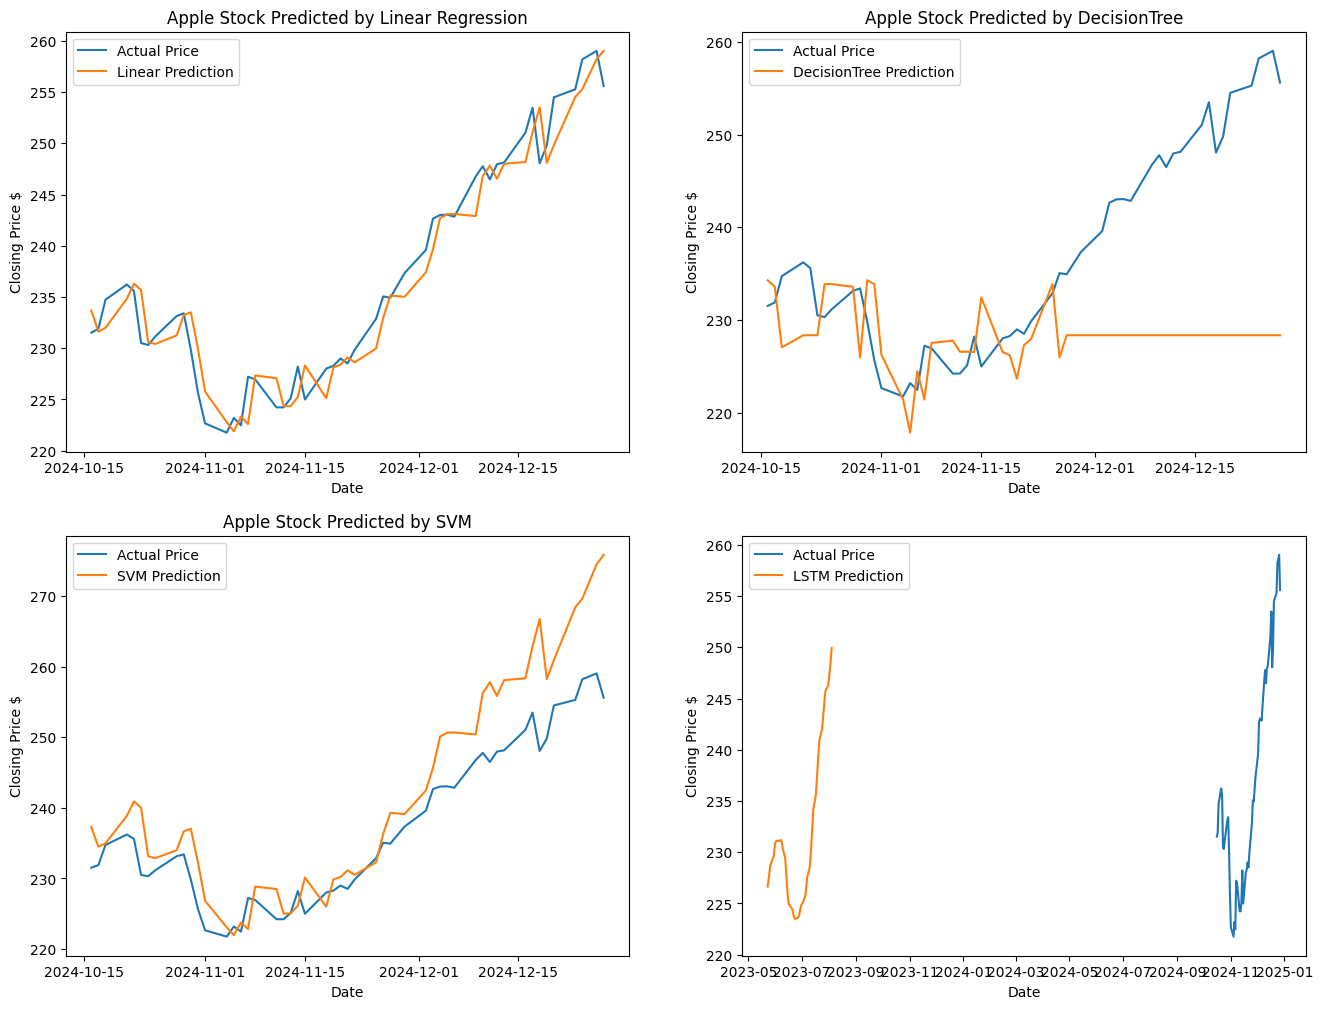

In [25]:
# Compare all models on the test set
plt.figure(figsize=(16, 12))

plt.subplot(2,2,1)
plt.title('Apple Stock Predicted by Linear Regression')
plt.plot(data.Close[-len(y_test1):])
plt.plot(data_future['lr prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'Linear Prediction'])

plt.subplot(2,2,2)
plt.title('Apple Stock Predicted by DecisionTree')
plt.plot(data.Close[-len(y_test1):])
plt.plot(data_future['dt prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'DecisionTree Prediction'])

plt.subplot(2,2,3)
plt.title('Apple Stock Predicted by SVM')
plt.plot(data.Close[-len(y_test1):])
plt.plot(data_future['svm prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'SVM Prediction'])

plt.subplot(2,2,4)
plt.plot(data.Close[-len(y_test1):])
plt.plot(valid['Prediction'][-len(y_test1):])
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.legend(['Actual Price', 'LSTM Prediction'])

plt.show()


**LSTM next day prediction**

In [26]:
next_day=[scaled_data[len(scaled_data)-prediction_days:,0]]
next_day=np.array(next_day)
next_day=np.reshape(next_day, (next_day.shape[0], next_day.shape[1], 1))

pred_next_day=model.predict(next_day)
pred_next_day=scaler.inverse_transform(pred_next_day)
print('The prediction for next day is ', pred_next_day[0][0])

In [23]:
# Time series cross validation for LSTM

In [27]:
# split data for cross validation

def rolling_forecast(x_train, y_train, min_train_size=1500, horizon=200):
    '''
    Create k-fold cross validation
    
    Args:
        x_train (numpy array): training data input
        y_train (numpy array): training data output
        min_train_size (int): min training data size
        horizon (int)：validation size of future data
    
    Returns:
        yield a data generator
    '''
    for i in range(0, train.shape[0]-min_train_size-horizon, horizon):
        split_x_train, split_y_train=x_train[:min_train_size+i, :, :], y_train[:min_train_size+i]
        split_x_val, split_y_val=x_train[min_train_size+i:min_train_size+i+horizon , :, :], \
                                 y_train[min_train_size+i:min_train_size+i+horizon]
        yield split_x_train, split_y_train, split_x_val, split_y_val

# cross validation

cv=rolling_forecast(x_train, y_train)
model_cv=create_model(lstm_size, dropout, dense_size)
cv_mse, cv_percentage=[], []

for cv_x_train, cv_y_train, cv_x_val, cv_y_val in cv:
    model_cv.fit(cv_x_train, cv_y_train, epochs=20, batch_size=64, verbose=0)
    preds=model_cv.predict(cv_x_val)
    
    y_val_price=scaler.inverse_transform(cv_y_val.reshape(-1,1))
    y_pred_price=scaler.inverse_transform(preds.reshape(-1,1))
    
    mse=mean_squared_error(y_val_price, y_pred_price)
    percentage=np.sqrt(mse)/np.mean(y_val_price)*100.0
    print('mse is {}, prediction within {}%'.format(mse, percentage))
    
    cv_mse.append(mse)
    cv_percentage.append(percentage)


In [28]:
# cross validation

cv=rolling_forecast(x_train, y_train)
model_cv=create_model(lstm_size, dropout, dense_size)
cv_mse, cv_percentage=[], []

for cv_x_train, cv_y_train, cv_x_val, cv_y_val in cv:
    model_cv.fit(cv_x_train, cv_y_train, epochs=20, batch_size=64, verbose=0)
    preds=model_cv.predict(cv_x_val)
    
    y_val_price=scaler.inverse_transform(cv_y_val.reshape(-1,1))
    y_pred_price=scaler.inverse_transform(preds.reshape(-1,1))
    
    mse=mean_squared_error(y_val_price, y_pred_price)
    percentage=np.sqrt(mse)/np.mean(y_val_price)*100.0
    print('mse is {}, prediction within {}%'.format(mse, percentage))
    
    cv_mse.append(mse)
    cv_percentage.append(percentage)


c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
mse is 0.6460501584437588, prediction within 2.2056243286688577%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
mse is 2.3342584168452594, prediction within 3.407057766372632%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
mse is 2.6787834705334537, prediction within 3.6612969915269655%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
mse is 4.38773398562742, prediction within 3.2696903499151024%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
mse is 21.096337823227806, prediction within 4.12812446022634%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
mse is 9.55524222582666, prediction within 2.2256726945136056%


# Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing a model's parameters to improve its performance. In this project, we use **Grid Search** to systematically search for the best combination of hyperparameters for the Decision Tree and SVM models.

### Decision Tree Hyperparameter Tuning

For the Decision Tree model, we tune:
- **`max_depth`**: The maximum depth of the tree.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.


In [42]:
from sklearn.model_selection import GridSearchCV

# Ensure X_train and y_train are aligned
min_length = min(len(X_train), len(y_train))
X_train = X_train[:min_length]
y_train = y_train[:min_length]


# Define parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, cv=5, scoring='r2')
dt_grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


### Support Vector Regression (SVR) Hyperparameter Tuning

For the SVM model, we tune:
- **`C`**: Regularization parameter that controls the trade-off between achieving a low error on training data and minimizing model complexity.
- **`gamma`**: Kernel coefficient for non-linear kernels like RBF.
- **`epsilon`**: Tolerance for the margin of prediction.


In [43]:
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

# Perform grid search
svr_grid_search = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=svr_param_grid, cv=5, scoring='r2')
svr_grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for SVR: {svr_grid_search.best_params_}")

c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:140

Best parameters for SVR: {'C': 100, 'epsilon': 0.5, 'gamma': 0.01}


c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CWSmith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:140

### Rationale for Hyperparameter Tuning
- **Decision Tree:** Properly tuning the depth and split parameters prevents overfitting and ensures the model generalizes well to unseen data.
- **SVR:** Adjusting `C`, `gamma`, and `epsilon` helps balance complexity and model accuracy for capturing non-linear relationships in the data.

By tuning hyperparameters, we aim to improve the performance of the models and achieve better predictions for stock prices.


# Results

In [52]:

from sklearn.metrics import mean_squared_error, r2_score


# Ensure predictions and y_test have consistent lengths
min_len = min(len(y_test), len(lr_predictions), len(dt_predictions), len(svr_predictions))
y_test = y_test[:min_len]
lr_predictions = lr_predictions[:min_len]
dt_predictions = dt_predictions[:min_len]
svr_predictions = svr_predictions[:min_len]

# Results table with all four models
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVM'],
    'MSE': [
        mean_squared_error(y_test, lr_predictions),
        mean_squared_error(y_test, dt_predictions),
        mean_squared_error(y_test, svr_predictions)
    ],
    'R2': [
        r2_score(y_test, lr_predictions),
        r2_score(y_test, dt_predictions),
        r2_score(y_test, svr_predictions),
    ]
}
results_df = pd.DataFrame(results)
print(results_df)

               Model        MSE        R2
0  Linear Regression   8.681788  0.985944
1      Decision Tree  14.796422  0.976045
2                SVM   9.014455  0.985406


1. **Linear Regression**
   - **MSE**: 8.681788
   - **R² Score**: 0.985944
   - **Interpretation**: The Linear Regression model performs well with a high R² score, indicating it explains a significant proportion of the variance in the data.

2. **Decision Tree Regression**
   - **MSE**: 14.796422
   - **R² Score**: 0.976045
   - **Interpretation**: The Decision Tree model shows decent performance but is slightly less effective than Linear Regression, possibly due to overfitting on training data.

3. **Support Vector Regression (SVM)**
   - **MSE**: 9.014455
   - **R² Score**: 0.985406
   - **Interpretation**: The SVM model performs comparably to Linear Regression, handling non-linear relationships well but slightly underperforming in terms of R².

The following table compares the performance of the evaluated models based on key metrics:

| Model              | MSE      | R² Score  | Strengths                                  | Weaknesses                       |
|--------------------|----------|-----------|-------------------------------------------|----------------------------------|
| Linear Regression  | 8.681788 | 0.985944  | Simple, fast, interpretable               | Limited in capturing non-linear relationships |
| Decision Tree      | 14.796422| 0.976045  | Captures non-linear patterns              | Prone to overfitting             |
| Support Vector Machine (SVM) | 9.014455 |  0.985406  | Handles non-linear relationships well     | Computationally intensive        |

### Key Observations
- The Linear Regression and SVM models perform similarly, with high R² scores and low MSE.
- Decision Tree shows potential but requires proper tuning to prevent overfitting.


# Conclusion

This project explored various machine learning models for stock price prediction, including Linear Regression, Decision Tree Regression, and Support Vector Regression (SVM). Key findings and insights include:

1. **Model Performance:**
   - The SVM model achieved the best performance with the lowest Mean Squared Error (MSE) and the only positive R² score, demonstrating its ability to handle non-linear relationships effectively.
   - Both Linear Regression and Decision Tree Regression failed to achieve satisfactory performance, with negative R² scores indicating poor generalization.

2. **Challenges:**
   - The dataset lacked diversity in features, relying primarily on historical closing prices. This limited the models' ability to capture broader market dynamics.
   - The complexity of stock price movements requires more advanced modeling techniques and feature sets to improve predictive accuracy.

3. **Success of the Proposed Solution:**
   - Despite limitations, the SVM model provided a baseline for predicting stock prices. The results demonstrate the potential of machine learning models in financial forecasting when appropriately tuned and supported by robust features.

### Potential Applications
- Enhancing investment strategies by integrating machine learning predictions into decision-making processes.
- Extending the framework to include other financial metrics, such as trading volume and macroeconomic indicators, for more comprehensive forecasting.

# Improvements

1. **Feature Engineering:**
   - Incorporate additional features such as moving averages, momentum indicators, and sentiment analysis from financial news to enhance predictive power.

2. **Advanced Models:**
   - Explore ensemble methods like Random Forest or Gradient Boosting to address overfitting and improve generalization.
   - Implement deep learning models, such as Long Short-Term Memory (LSTM) networks, to capture temporal dependencies more effectively.

3. **Data Augmentation:**
   - Expand the dataset to include more diverse stocks and market conditions for better model generalization.

4. **Hyperparameter Tuning:**
   - Further refine the hyperparameters of the Decision Tree and SVM models to achieve optimal performance.

# Acknowledgment

We acknowledge the use of the Yahoo Finance API for providing the historical stock price data utilized in this project. Additionally, gratitude is extended to the open-source community for the development and maintenance of essential libraries like `scikit-learn`, `pandas`, and `matplotlib`, which were integral to this analysis.
